In [1]:
#library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#import data yang akan dipakai
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# from google.colab import drive
# drive.mount('/content')

In [6]:
#normalisasi data string menjadi numerical
#label encoder
le = preprocessing.LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [7]:
#menampilkan data atribut
for col in data.columns:
    if data[col].dtype == 'object' or (data[col].dtype == 'int64' and col != 'id'):
        print(col,"->", data[col].unique())

gender -> [1 0 2]
hypertension -> [0 1]
heart_disease -> [1 0]
ever_married -> [1 0]
work_type -> [2 3 0 4 1]
Residence_type -> [1 0]
smoking_status -> [1 2 3 0]
stroke -> [1 0]


In [8]:
data.head(500)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,34299,0,71.0,0,0,1,2,1,93.28,34.7,2,0
496,54375,1,5.0,0,0,0,4,0,122.19,35.0,0,0
497,37832,0,14.0,0,0,0,4,0,129.53,21.3,2,0
498,21058,0,15.0,0,0,0,4,0,114.53,29.1,0,0


In [9]:
# Replace N/A values in bmi column with bmi median value
#normalisasi data bmi yang hilang menjadi metode median data cleaning
data['bmi'].fillna(data['bmi'].median(), inplace=True)

data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

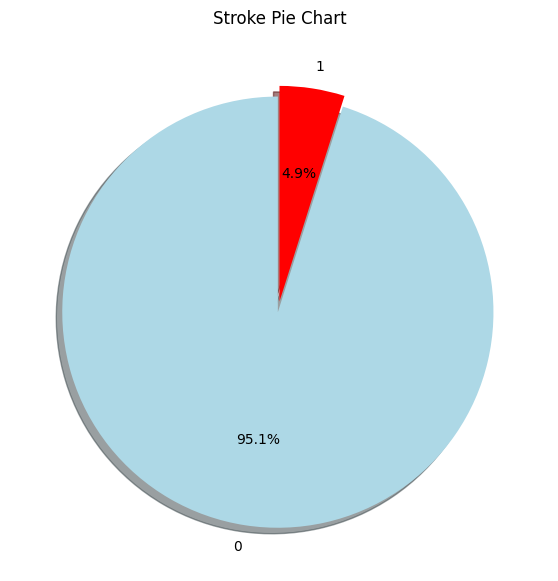

In [10]:
#Pie chart

labels =data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Stroke Pie Chart')
plt.show()

Data diatas menunjukkan bahwa hanya 5% orang yang memiliki kanker.

In [11]:
#pelebelan data yang akan ditrain dan pemisahan data training dan test
x = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = data['stroke']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
#training data
import time
t1 = time.perf_counter()

#buat model objek
clf = MLPClassifier(hidden_layer_sizes=(5,6),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    momentum=0.1,early_stopping=False, warm_start=True)

clf.fit(x_train,y_train)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

Iteration 1, loss = 0.28473269
Iteration 2, loss = 0.20141812
Iteration 3, loss = 0.18183983
Iteration 4, loss = 0.17552947
Iteration 5, loss = 0.17446707
Iteration 6, loss = 0.17682436
Iteration 7, loss = 0.17978087
Iteration 8, loss = 0.17790040
Iteration 9, loss = 0.17935277
Iteration 10, loss = 0.16997754
Iteration 11, loss = 0.16894554
Iteration 12, loss = 0.16674123
Iteration 13, loss = 0.16539848
Iteration 14, loss = 0.16459029
Iteration 15, loss = 0.16614840
Iteration 16, loss = 0.16335663
Iteration 17, loss = 0.16153220
Iteration 18, loss = 0.16327099
Iteration 19, loss = 0.16422238
Iteration 20, loss = 0.16352283
Iteration 21, loss = 0.16122554
Iteration 22, loss = 0.16348294
Iteration 23, loss = 0.16010414
Iteration 24, loss = 0.16005529
Iteration 25, loss = 0.16065675
Iteration 26, loss = 0.16538737
Iteration 27, loss = 0.16186118
Iteration 28, loss = 0.15972080
Iteration 29, loss = 0.16328071
Iteration 30, loss = 0.15943483
Iteration 31, loss = 0.15953667
Iteration 32, los

In [13]:
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print("Akurasi : " ,accuracy_score(y_test,ypred))
print("Error : ", 1-accuracy_score(y_test,ypred))


Akurasi :  0.9393346379647749
Error :  0.0606653620352251


In [14]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

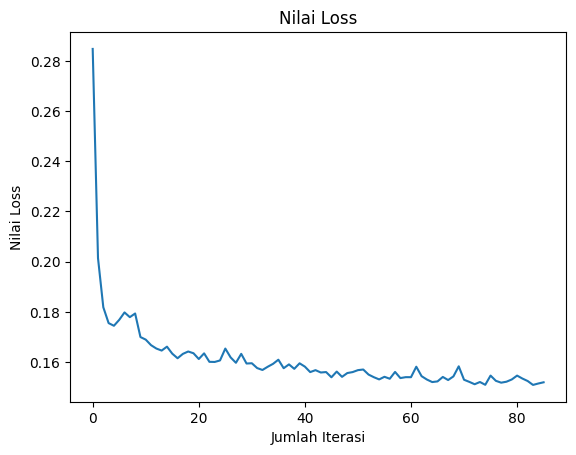

In [15]:
#loss values visualization, setelah 86 iterasi model tidak akan mengalami perbaikan loss
#
# Loss merupakan nilai yang menunjukkan keseluruhan error dalam model yang ada.
# Hal ini mengukur seberapa baik atau buruk model kita akan bekerja.
# Ketika error yang ada itu tinggi maka loss juga tinggi,
# yang berarti bahwa model menghasilkan performa yang buruk.
# Sebaliknya, loss yang semakin rendah maka performa yang ada semakin bagus.

prd_r = clf.predict(x_test)
test_accC = accuracy_score(y_test, prd_r) * 100
loss_values = clf.loss_curve_

plt.plot(loss_values)
plt.title("Nilai Loss")
plt.xlabel("Jumlah Iterasi")
plt.ylabel("Nilai Loss")

plt.show()



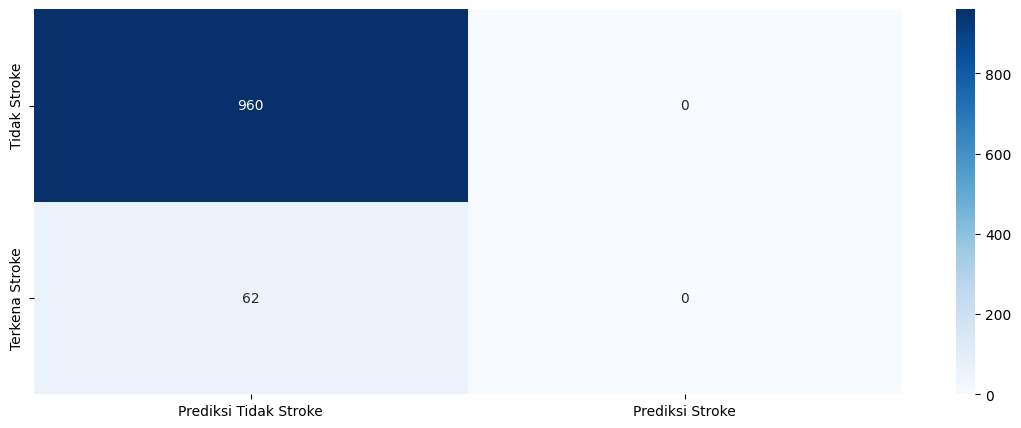

In [16]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

y_pred =clf.predict(x_test)

plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Prediksi Tidak Stroke','Prediksi Stroke'],index=['Tidak Stroke','Terkena Stroke'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues");

In [17]:
from sklearn.metrics import f1_score

test_pred= clf.predict(x_test)

In [18]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

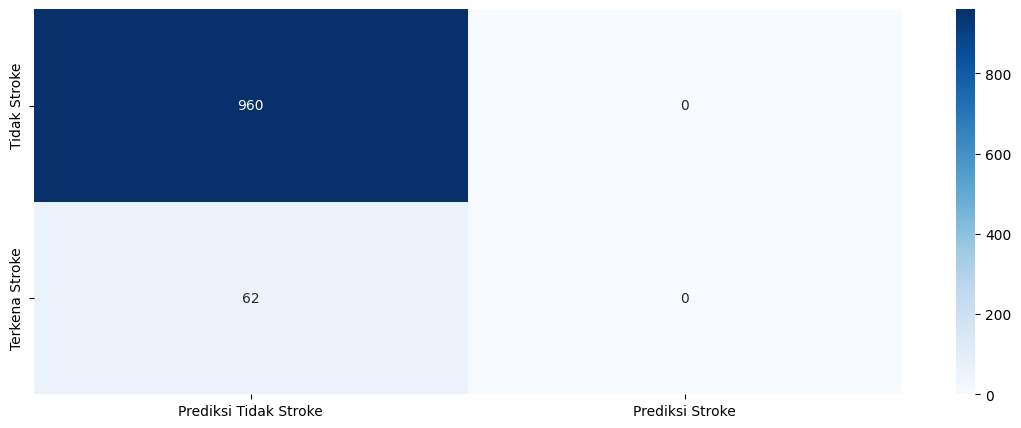

In [19]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Prediksi Tidak Stroke','Prediksi Stroke'],index=['Tidak Stroke','Terkena Stroke'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues");

In [20]:
#sensitifitas = kemampuan tes untuk menunjukkan individu yang menderita sajit dari seluruh populasi yang benar2 sakit
#spesifitas = kemampuan tes untuk menunjukkan individu mana yang tidak menderita sakit dari yang benar2 sakit
print('Akurasi = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Error = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivitas atau Positif Rate Benar = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specifitas or NegatiF Rate Benar = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',
'precision = ', TP, TN, FP, FN)

Akurasi = TP+TN/(TP+TN+FP+FN) =        0.9393346379647749 
 Error = 1-Accuracy =                   0.0606653620352251 
 Sensitivitas atau Positif Rate Benar = TP/(TP+FN) =        0.0 
 Specifitas or NegatiF Rate Benar = TN/(TN+FP) =        1.0 
 precision =  0 960 0 62


In [21]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[960   0]
 [ 62   0]]


In [22]:
#Presisi menunjukkan 0 karena distribusi data yang non stroke bisa lebih banyak dari yang stroke
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))

0.0

In [23]:
import matplotlib.pyplot as plt

In [24]:
#menampilkan accuracy, error, dan run time
import time
t1 = time.perf_counter()

ypred = clf.predict(x_test)

print(accuracy_score(y_test,ypred))
print(1-(accuracy_score(y_test,ypred)))

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

0.9393346379647749
0.0606653620352251
time taken to run: 0.007521112000063113


In [25]:
!git clone https://github.com/jzliu-100/visualize-neural-network
!git clone https://github.com/jzliu-100/visualize-neural-network/blob/master/VisualizeNN.py


Cloning into 'visualize-neural-network'...
remote: Enumerating objects: 61, done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 61
Unpacking objects: 100% (61/61), 3.82 MiB | 5.84 MiB/s, done.
Cloning into 'VisualizeNN.py'...
fatal: repository 'https://github.com/jzliu-100/visualize-neural-network/blob/master/VisualizeNN.py/' not found


In [26]:
cd /content/visualize-neural-network

/content/visualize-neural-network


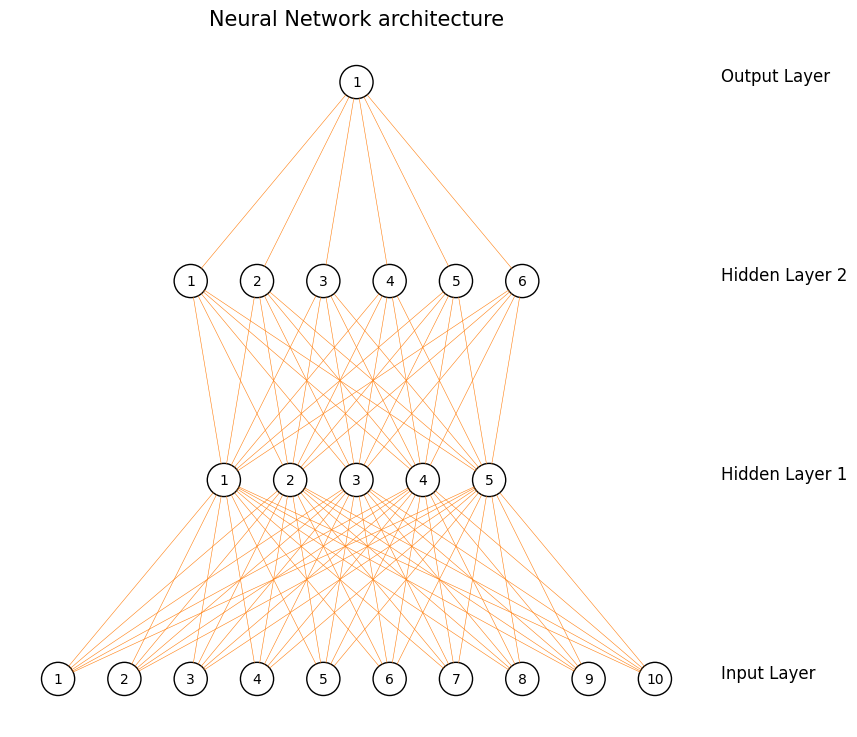

In [28]:
# visualisasi dari neural network yang dibuat
import VisualizeNN as VisNN
network=VisNN.DrawNN([10,5,6,1])
network.draw()